Epoch: 1, Loss: 0.1763
Epoch: 2, Loss: 0.1584
Epoch: 3, Loss: 0.1493
Epoch: 4, Loss: 0.1375
Epoch: 5, Loss: 0.1407
Epoch: 6, Loss: 0.1435
Epoch: 7, Loss: 0.1365
Epoch: 8, Loss: 0.1325
Epoch: 9, Loss: 0.1334
Epoch: 10, Loss: 0.1382
Epoch: 11, Loss: 0.1314
Epoch: 12, Loss: 0.1268
Epoch: 13, Loss: 0.1562
Epoch: 14, Loss: 0.1334
Epoch: 15, Loss: 0.1250
Epoch: 16, Loss: 0.1358
Epoch: 17, Loss: 0.1181
Epoch: 18, Loss: 0.1169
Epoch: 19, Loss: 0.1275
Epoch: 20, Loss: 0.1332


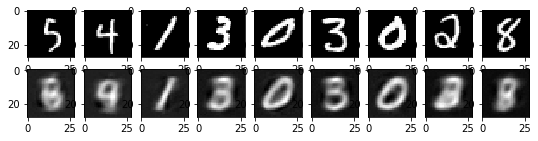

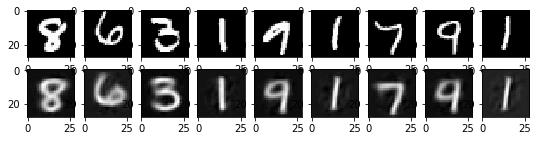

In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define data transformations (required for MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),   # Convert PIL image or numpy array to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values for grayscale images
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./MNIST', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./MNIST', train=False, transform=transform, download=True)

# Create DataLoader to efficiently load batches
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),  
            nn.Linear(128, 64),
            nn.ReLU(),  
            nn.Linear(64, 12),
            nn.ReLU(),   
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),  
            nn.Linear(64, 128),
            nn.ReLU(), 
            nn.Linear(128, 256),
            nn.ReLU(), 
            nn.Linear(256, 28*28)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create the model and set up training
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 20
outputs = []

for epoch in range(num_epochs):
    for (img, _) in train_loader:
        img = img.view(-1, 28*28)  # Reshape the input image
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Append the loss to the outputs list
    outputs.append((img, recon, loss))
    
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

# Plot images and reconstructions for every 10 epochs
for k in range(0, num_epochs, 10):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][0].detach().numpy()
    recon = outputs[k][1].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9:
            break
        plt.subplot(2, 9, i+1)
        item = item.reshape(28, 28)
        plt.imshow(item)
    for i, item in enumerate(recon):
        if i >= 9:
            break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(28, 28)
        plt.imshow(item)

plt.show()
